In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [2]:
tenda_ba = pd.read_csv('tenda_propostas_BA.csv',sep=';',decimal = ',')

In [3]:
tenda_ba.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [4]:
tenda_ba.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17071800387345493,117000.0,1973.2,0.0
1,PRO17072802303346631,126927.9,1919.4,11600.0
2,PRO17072902329346627,130000.0,3257.7,15998.1
3,PRO17080703337346500,131500.0,3421.3,7757.6
4,PRO17081104200346966,125000.0,2500.5,8163.6


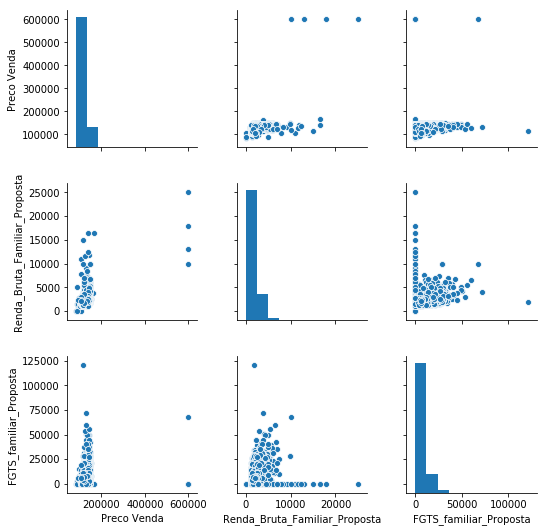

In [5]:
sb.pairplot(tenda_ba)

In [6]:
tenda_drop_ba = tenda_ba.drop(['Chave unica'],axis = 1)
tenda_drop_ba

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,117000.0,1973.2,0.0
1,126927.9,1919.4,11600.0
2,130000.0,3257.7,15998.1
3,131500.0,3421.3,7757.6
4,125000.0,2500.5,8163.6
5,132900.0,1917.0,17870.0
6,129000.0,1324.6,490.9
7,130000.0,2621.1,9379.8
8,123300.0,1800.0,580.5
9,130557.6,3642.1,0.0


K_MEANS (RS)

In [7]:
from sklearn.cluster import KMeans

In [8]:
sb.set_style('darkgrid')

In [9]:
wcss = []

1 1463488081611.8848
2 1211864302518.0425
3 1114017491170.2188
4 263334695886.44846
5 207675745293.64987
6 167140039595.42834
7 135903609432.35605
8 120725726681.26993
9 109396559002.07207


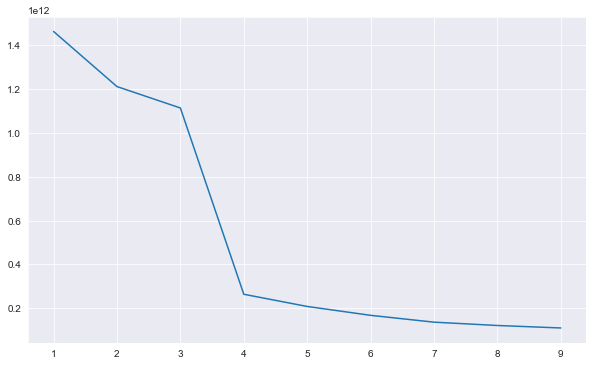

In [10]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_ba)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [11]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [12]:
kmeans.fit(tenda_drop_ba)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([0, 2, 2, ..., 0, 0, 0])

CLASSES CRIADAS 

In [14]:
tenda_ba['Kclasses'] = kmeans.labels_

In [15]:
tenda_ba. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17071800387345493,117000.0,1973.2,0.0,0
1,PRO17072802303346631,126927.9,1919.4,11600.0,2
2,PRO17072902329346627,130000.0,3257.7,15998.1,2
3,PRO17080703337346500,131500.0,3421.3,7757.6,2
4,PRO17081104200346966,125000.0,2500.5,8163.6,0
5,PRO17082205703346351,132900.0,1917.0,17870.0,2
6,PRO17083007122346929,129000.0,1324.6,490.9,0
7,PRO17083007181346627,130000.0,2621.1,9379.8,2
8,PRO17090908408346699,123300.0,1800.0,580.5,0
9,PRO17091809628346754,130557.6,3642.1,0.0,0


In [16]:
tenda_ba['Kclasses'] = kmeans.labels_

In [17]:
tenda_ba.Kclasses.value_counts()

0    3111
2    1678
1       4
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [18]:
tenda_ba.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,4793.00,4793.00,4793.00,4793.00
mean,126971.39,2156.08,5994.17,0.70
std,16018.73,1011.16,6912.32,0.95
min,82800.00,0.00,0.00,0.00
25%,122000.00,1666.00,732.20,0.00
50%,126078.20,1926.60,4291.50,0.00
75%,131714.50,2334.70,8683.50,2.00
max,600000.00,25000.00,120547.10,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


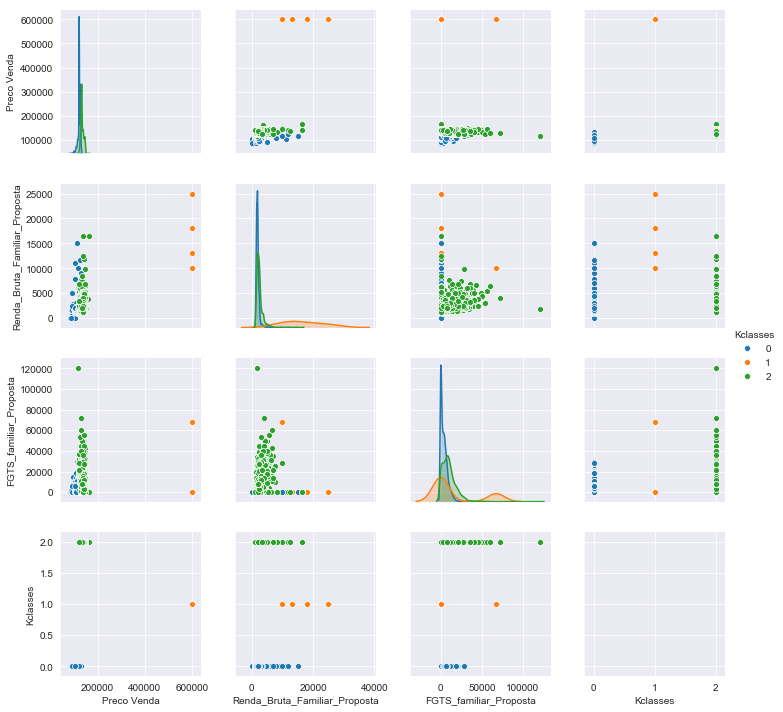

In [19]:
sb.pairplot(tenda_ba,hue='Kclasses')

EXPORTANDO DADOS

In [21]:
tenda_ba.to_csv('clustertenda_BA.csv',sep=';',decimal=',')